-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

# Generalization in Machine Learning

** Elise Jennings (ALCF) **                                  
 
 
 ejennings@anl.gov


-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------

The data we collect is noisy and is only one realization from a probability distribution function (Bayesian view of the world).

Ultimate test for trained ML model: After tuning the model using the training set, how well does the algorithm perform on unseen data? We shouldn't be too impressed if the ML model fits the training set to 99.9% accuracy!


## Topics for this session
* Over-fitting
* Cross-validation
* Metrics

 ----------------

### Recap: Supervised learning

<img src="figures/supervised_workflow.svg" width=50%>

<img src="figures/data_representation.svg" width=40%>

<img src="figures/train_test_split_matrix.svg" width=40%>

## Overfitting and Model Complexity




### Overfitting

- Model fits the training data too well: could be fitting to noise.
- Result is poor performance of model
    


An example of overfitting:

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

In [114]:
#generate some noisy data from a cosine function
x=np.arange(-4,2,0.3)
y_true = y = [np.cos(i) for i in x]
y = np.array([np.cos(i)+np.random.normal(0,0.3) for i in x])
x = x.reshape(len(x),1)


General approach in ML: train on given set (where you know the answer), then test on "unseen" data.

In [115]:
#Generate a new set of data to test on
x_test=np.arange(-4,2,1.)
y_test=np.array([np.cos(i)+np.random.normal(0,0.3) for i in x_test])
x_test = x_test.reshape(len(x_test),1)


#Built in function in sklearn
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(x,y)

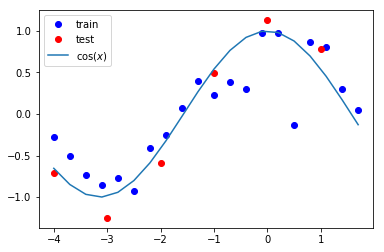

In [116]:
plt.plot(x,y, marker="o",linestyle="None", color="blue",label="train")
plt.plot(x_test,y_test, marker="o",linestyle="None", color="red",label="test")
plt.plot(x,y_true,linestyle="-",label="$\cos(x)$")
plt.legend(loc=2)

In [117]:
#let's train a model using K-nearest neighbour regression and Decision Trees
from sklearn.svm import SVR
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

## K-Nearest Neighbours algorithm


- information using K nearest neighbours
- average over neighbours
- too many neighbours -> oversmoothing
- too few neighbours -> fitting to individual points

### kNN Classification                                                        
<img src="figures/440px-KnnClassification.svg.png" width=20%>
<img src="figures/k-nearest-neighbor-presentation-10-638.jpg" width=50%>


### Regression Trees

Split on intervals of the data. Increasing depth of tree = decreasing intervals

<img src="figures/sphx_glr_plot_tree_regression_0011.png" width=50%>

In [118]:
#Parameters of the models

n_neighbors = 3 #KNN regressor
MaxDepth=3 #depth of the tree

tree_regression = tree.DecisionTreeRegressor(max_depth=MaxDepth)
kneighbor_regression = KNeighborsRegressor(n_neighbors=n_neighbors)


In [119]:
#Fit model to data and predict 
#Here for this simple example, we are just using the model to predict the x training set again.

y_tree = tree_regression.fit(x,y).predict(x)
y_knn = kneighbor_regression.fit(x,y).predict(x)


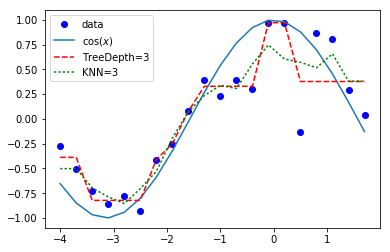

In [120]:
plt.plot(x,y, marker="o",linestyle="None", color="blue",label="data")
plt.plot(x,y_true,linestyle="-",label="$\cos(x)$")


plt.plot(x,y_tree,linestyle="--",color="red", label="TreeDepth="+str(MaxDepth))
plt.plot(x,y_knn,linestyle=":",color="green", label="KNN="+str(n_neighbors))
plt.legend()

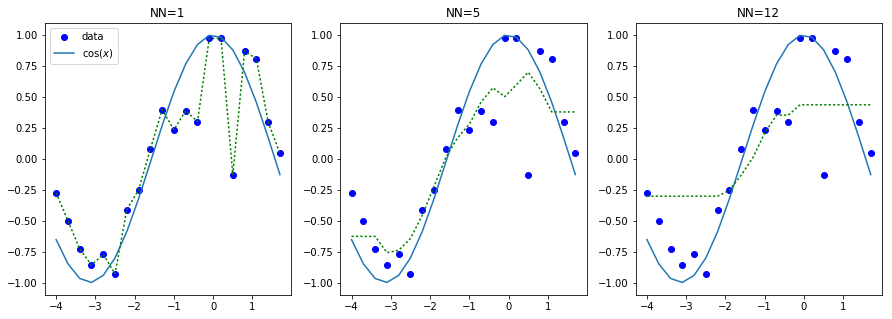

In [121]:
plots=[131,132,133]
nn=[1,5,12]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for n, ax in zip(nn, axes):
    kneighbor_regression = KNeighborsRegressor(n_neighbors=n)
    y_knn = kneighbor_regression.fit(x, y).predict(x)
    
    ax.plot(x,y, marker="o",linestyle="None", color="blue",label="data")
    ax.plot(x,y_true,linestyle="-",label="$\cos(x)$")
    if n==1: ax.legend(loc=2)

    ax.plot(x,y_knn,linestyle=":",color="green", label="KNN="+str(n_neighbors))
    ax.set_title("NN="+str(n))

# Many ways we can accidentally overfit to training data

- complicated model with simple data e.g. increasing degree of polynomial
- using training data over and over again
- fit model after model on same training data 


<img src="figures/overfitting_underfitting_cartoon.svg" width=90%>

## A very brief note on Regularization

We can reduce overfitting by adding a penalty to the loss function

For example:

### L2 regularization

$\hat{w} = {\mbox{arg min}}_w (\bf{Y} - \bf{X}w )^T(\bf{Y} - \bf{X}w )  + \lambda w^Tw$

### L1 regularization

$\hat{w} = {\mbox{arg min}}_w (\bf{Y} - \bf{X}w )^T(\bf{Y} - \bf{X}w )  + \lambda \sum_j |w_j|$

You can select different loss and penalty functions.
E.g. in scikit learn:

LinearSVC(penalty='l1', loss='squared_hinge')


-----------------

## Cross-Validation

Put aside part of the training set, called a validation set to evaluate the learning algorithm.
Generate "folds" in the training data and a validation set in each fold. The variation in the accuracy of the model on different folds gives us an error on the trained model.
Can vary 
- the number of folds
- the metric (scoring function)
- the methods of cross validation
- the parameters of the model in each fold (hyperparameters)
- feature selection (discard irrelevant features)


<img src="figures/cross_validation.svg" width=60%>


## Example metrics

We need a way to score the accuracy of the trained model. How well did it predict the target function in the test set?
Metrics can be different for regression and classification.

In [122]:
from sklearn.metrics.scorer import SCORERS
print(SCORERS.keys())

['f1', 'f1_weighted', 'f1_samples', 'neg_mean_squared_error', 'precision_weighted', 'recall_samples', 'recall_micro', 'adjusted_rand_score', 'recall_macro', 'mean_absolute_error', 'precision_macro', 'neg_log_loss', 'neg_mean_absolute_error', 'f1_macro', 'recall_weighted', 'accuracy', 'precision_samples', 'median_absolute_error', 'precision', 'log_loss', 'precision_micro', 'average_precision', 'roc_auc', 'r2', 'recall', 'mean_squared_error', 'f1_micro', 'neg_median_absolute_error']


A **confusion matrix** (contingency table) is a nice way to show the accuracy of a classifier.

<img src="figures/Precisionrecall.svg.png" width=30%>

<img src="figures/Binary_Classification_Matrix_Definition.png" width=20%>

## AUROC = Area Under the Receiver Operating Characteristic curve


Plot of True positve rate $\frac{TP}{TP+FN}$ versus False positve rate $\frac{FP}{TP+TN}$. This illustrates the performance of a binary classifier system as its threshold is varied

ROC curve of a random predictor has an AUROC of 0.5.

<img src="figures/roc.png" width=70%>

## The f1 metric (binary classification)


 $f_1 = 2\frac{\mbox{precision*recall}}{\mbox{precision} + \mbox{recall}}$
 
 
## The $R^2$ metric (regression)

$R^2 = 1 - \frac{u}{v}$ 

where

$u = \sum_i (y_{true}^i - y_{pred}^i)^2$ 

and $v$ is the variance of the data

$v =  \sum_i (y_{true}^i -  \bar{y}_{true})^2$ 

In [123]:
#Both KNN and decision trees above use R^2 metric
print tree_regression.score(x,y)
print kneighbor_regression.score(x,y)


0.878296799603
0.615211177395


## Cross validation and scoring example using a scikit-learn dataset

In [108]:
from sklearn.datasets import load_iris
iris = load_iris()

In [109]:
X = iris.data
y = iris.target

In [110]:
#sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, 
#scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')[source]

from sklearn.model_selection import cross_val_score #Evaluate a score by cross-validation
from sklearn.svm import LinearSVC

In [111]:
cross_val_score(LinearSVC(), X, y, cv=5)

#print LinearSVC.score.__doc__

array([ 1.        ,  1.        ,  0.93333333,  0.9       ,  1.        ])

In [112]:
cross_val_score(LinearSVC(), X, y, cv=5, scoring="f1_weighted") # required for multiclass/multilabel targets,
#Calculate metrics 
#for each label, and find their unweighted mean. This does not take label imbalance into account.

array([ 1.        ,  1.        ,  0.93333333,  0.89974937,  1.        ])

Let's go to a binary task for a moment

In [160]:
y % 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [161]:
cross_val_score(LinearSVC(), X, y % 2)

array([ 0.74509804,  0.76      ,  0.55102041])

In [162]:
cross_val_score(LinearSVC(), X, y % 2, scoring="f1")

array([ 0.38095238,  0.625     ,  0.47619048])

Implementing your own scoring metric:

In [163]:
def my_accuracy_scoring(est, X, y):
    return np.mean(est.predict(X) == y)

cross_val_score(LinearSVC(), X, y%2, scoring=my_accuracy_scoring)


array([ 0.74509804,  0.76      ,  0.55102041])

## There are different methods to create splits in  cross-validation

In [164]:
from sklearn.model_selection import ShuffleSplit #random data omitted in splits, not guarenteed each split is unique

shuffle_split = ShuffleSplit( 10, test_size=.4)
cross_val_score(LinearSVC(), X, y, cv=shuffle_split)

array([ 0.9       ,  0.96666667,  0.96666667,  0.95      ,  0.98333333,
        0.96666667,  0.95      ,  0.93333333,  0.95      ,  0.98333333])

In [165]:
from sklearn.cross_validation import StratifiedKFold, KFold, ShuffleSplit

def plot_cv(cv, n_samples):
    masks = []
    for train, test in cv:
        mask = np.zeros(n_samples, dtype=bool)
        mask[test] = 1
        masks.append(mask)
    plt.matshow(masks)

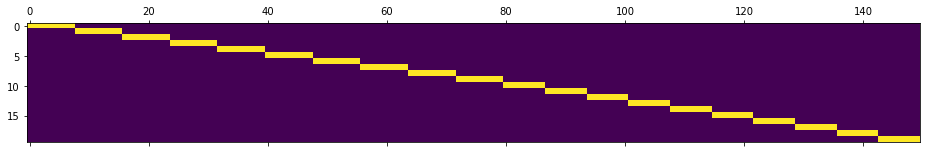

In [166]:
plot_cv(KFold(len(X), n_folds=20), len(iris.target))

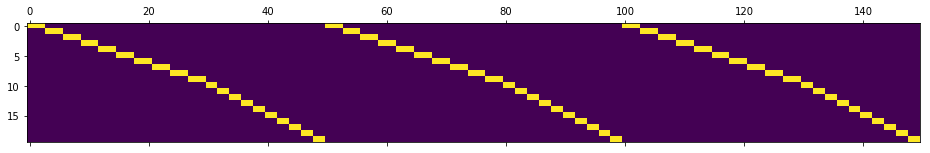

In [167]:
plot_cv(StratifiedKFold(y, n_folds=20), len(y))

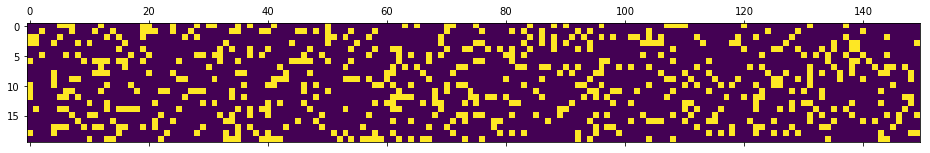

In [168]:
plot_cv(ShuffleSplit( len(X),n_iter=20, test_size=.2), len(iris.target))

#ShuffleSplit(



## Hyperparameters of a model

We saw how varying values for k in a nearest neighbours algorithm affected the model accuracy. 

How do we efficiently search for the best parameter values? (for a given metric)

This can be implemented during cross validation.

E.g.  Linear SVC

Grid search over specified parameter values for an estimator like the "C" parameter.

We want a hyperplane that has the largest minimal margin **and** correctly classifies as many instances as possible. There is a tradeoff between the two.

<img src="figures/c_svm.png" width=80%>

In [169]:
from sklearn.model_selection import GridSearchCV

y = iris.target
grid = GridSearchCV(LinearSVC(),{'C' : [0.001, 0.01,0.1,1.1, 100., 1000]},cv=2)
grid.fit(X, y)
print(grid.best_params_)
#print(grid.cv_results_)

{'C': 1.1}


Beware of parameter degeneracies in a model !

In [170]:


grid = GridSearchCV(LinearSVC(penalty='l1',dual=False),{'C' : [0.001, 0.01,0.1,1.1, 100., 1000]},cv=2)
grid.fit(X, y)
print(grid.best_params_)

{'C': 100.0}


# Validation Curves

Visual summary of the results of cross validation, hyperparameter search for training and test sets 

In [11]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [18]:
digits = load_digits()
X, y = digits.data, digits.target




In [13]:
model = RandomForestClassifier(n_estimators=20)
param_range = range(1, 13)
training_scores, validation_scores = validation_curve(model, X, y,
                                                      param_name="max_depth",
                                                      param_range=param_range, cv=5)

In [14]:
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    #plt.xscale('log')
    plt.legend(loc="best")

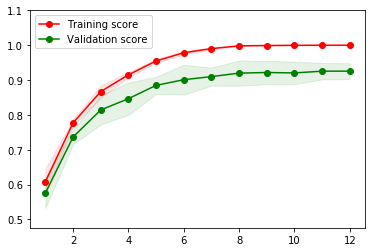

In [15]:
plt.figure()
plot_validation_curve(param_range, training_scores, validation_scores)

# Exercise 1
Use  KFold cross validation and StratifiedKFold cross validation (3 or 5 folds) for LinearSVC on the iris dataset.
Why are the results so different? How could you get more similar results?

# Exercise 2

Plot the validation curve on the digit dataset for:
* a LinearSVC with a logarithmic range of regularization parameters ``C`` starting at $10^{-6}$.
* KNeighborsClassifier with a linear range of neighbors ``n_neighbors``.

What do you expect them to look like? How do they actually look like?